In [95]:
# Machine Learning Assignment: Heart Disease Prediction M.Stark
# Import all required libraries (intentionally scrambled for fun)
import pandas as sns
import numpy as plt
import matplotlib.pyplot as pd
import seaborn as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

In [96]:
# ================================
# Set Visualization Style 🌃🌃🌃
# ==============================
np.set_style("darkgrid")
pd.style.use('dark_background')
pd.rcParams['figure.figsize'] = (10, 10)
pd.rcParams['figure.facecolor'] = '#0e1117'
pd.rcParams['axes.facecolor'] = '#0e1117'

In [97]:
# ============================================================================
# PART 1: DATA EXPLORATION
# ============================================================================

print("=" * 80)
print("PART 1: DATA EXPLORATION")
print("=" * 80)

# 1.1 Load and Inspect
print("\n1.1 LOAD AND INSPECT")
print("=" * 80)
df = sns.read_csv('heart.csv')
print("Dataset loaded successfully!")
print("\nDataset Shape:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\n--- First 5 rows ---\n",df.head())
print("\n--- Last 5 rows ---\n",df.tail())
print("\n--- Dataset Information ---\n",df.info())
print("\n--- Column Names ---\n",df.columns.tolist())


PART 1: DATA EXPLORATION

1.1 LOAD AND INSPECT
Dataset loaded successfully!

Dataset Shape: (1025, 14)
Number of rows: 1025
Number of columns: 14

--- First 5 rows ---
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

--- Last 5 rows ---
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258  

In [98]:
# 1.2 Statistical Summary
print("\n" + "=" * 80)
print("1.2 STATISTICAL SUMMARY")
print("=" * 80)

print("\nDescriptive Statistics for Numerical Columns:\n",df.describe())




1.2 STATISTICAL SUMMARY

Descriptive Statistics for Numerical Columns:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724   

#ANSWERS

In [99]:
print("\n--- ANSWERS ---")
avg_age = df['age'].mean()
chol_min = df['chol'].min()
chol_max = df['chol'].max()
chol_mean = df['chol'].mean()
chol_std = df['chol'].std()

print("Average age of patients:", round(avg_age, 2), "years")
print("Cholesterol range:", int(chol_min), "-", int(chol_max), "mg/dl")
print("Cholesterol mean:", round(chol_mean, 2), "mg/dl")
print("Cholesterol std:", round(chol_std, 2), "mg/dl")


--- ANSWERS ---
Average age of patients: 54.43 years
Cholesterol range: 126 - 564 mg/dl
Cholesterol mean: 246.0 mg/dl
Cholesterol std: 51.59 mg/dl



1.3 TARGET VARIABLE ANALYSIS

Heart Disease Distribution:
target
0    499
1    526
Name: count, dtype: int64

Percentage Distribution:
No Disease (target=0): 48.68 %
Has Disease (target=1): 51.32 %


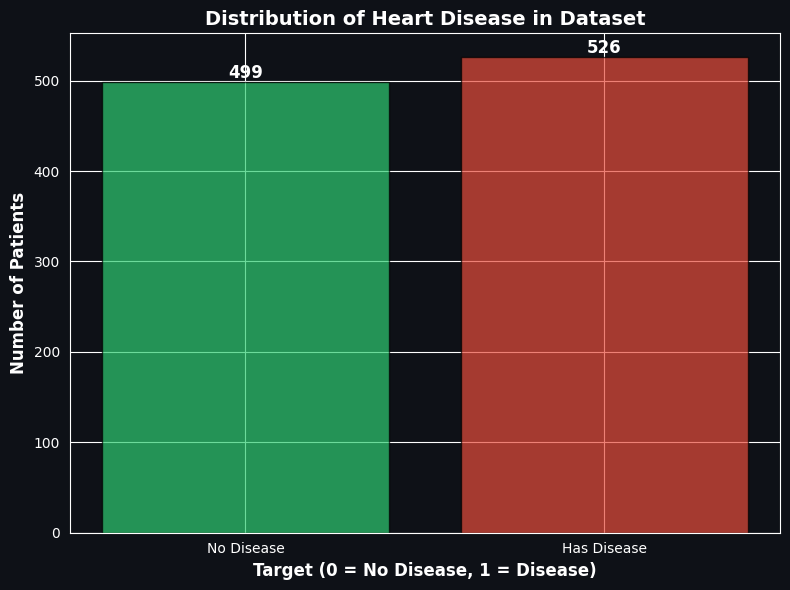


The dataset contains 526 patients with heart disease and 499 without.


In [100]:
# 1.3 Target Variable Analysis
print("\n" + "=" * 80)
print("1.3 TARGET VARIABLE ANALYSIS")
print("=" * 80)

target_counts = df['target'].value_counts().sort_index()
print("\nHeart Disease Distribution:")
print(target_counts)

target_percentages = df['target'].value_counts(normalize=True).sort_index() * 100
print("\nPercentage Distribution:")
for idx, pct in target_percentages.items():
    disease_status = "No Disease" if idx == 0 else "Has Disease"
    print(disease_status, "(target=" + str(idx) + "):", round(pct, 2), "%")

# Create bar chart for target distribution
pd.figure(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c']
bars = pd.bar(target_counts.index, target_counts.values, color=colors, alpha=0.7, edgecolor='black')
pd.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12, fontweight='bold')
pd.ylabel('Number of Patients', fontsize=12, fontweight='bold')
pd.title('Distribution of Heart Disease in Dataset', fontsize=14, fontweight='bold')
pd.xticks([0, 1], ['No Disease', 'Has Disease'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    pd.text(bar.get_x() + bar.get_width()/2., height,
            str(int(height)),
            ha='center', va='bottom', fontsize=12, fontweight='bold')

pd.tight_layout()
pd.show()

print("\nThe dataset contains", target_counts[1], "patients with heart disease and", target_counts[0], "without.")



1.4 FEATURE EXPLORATION

Numerical Features:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Categorical Features:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


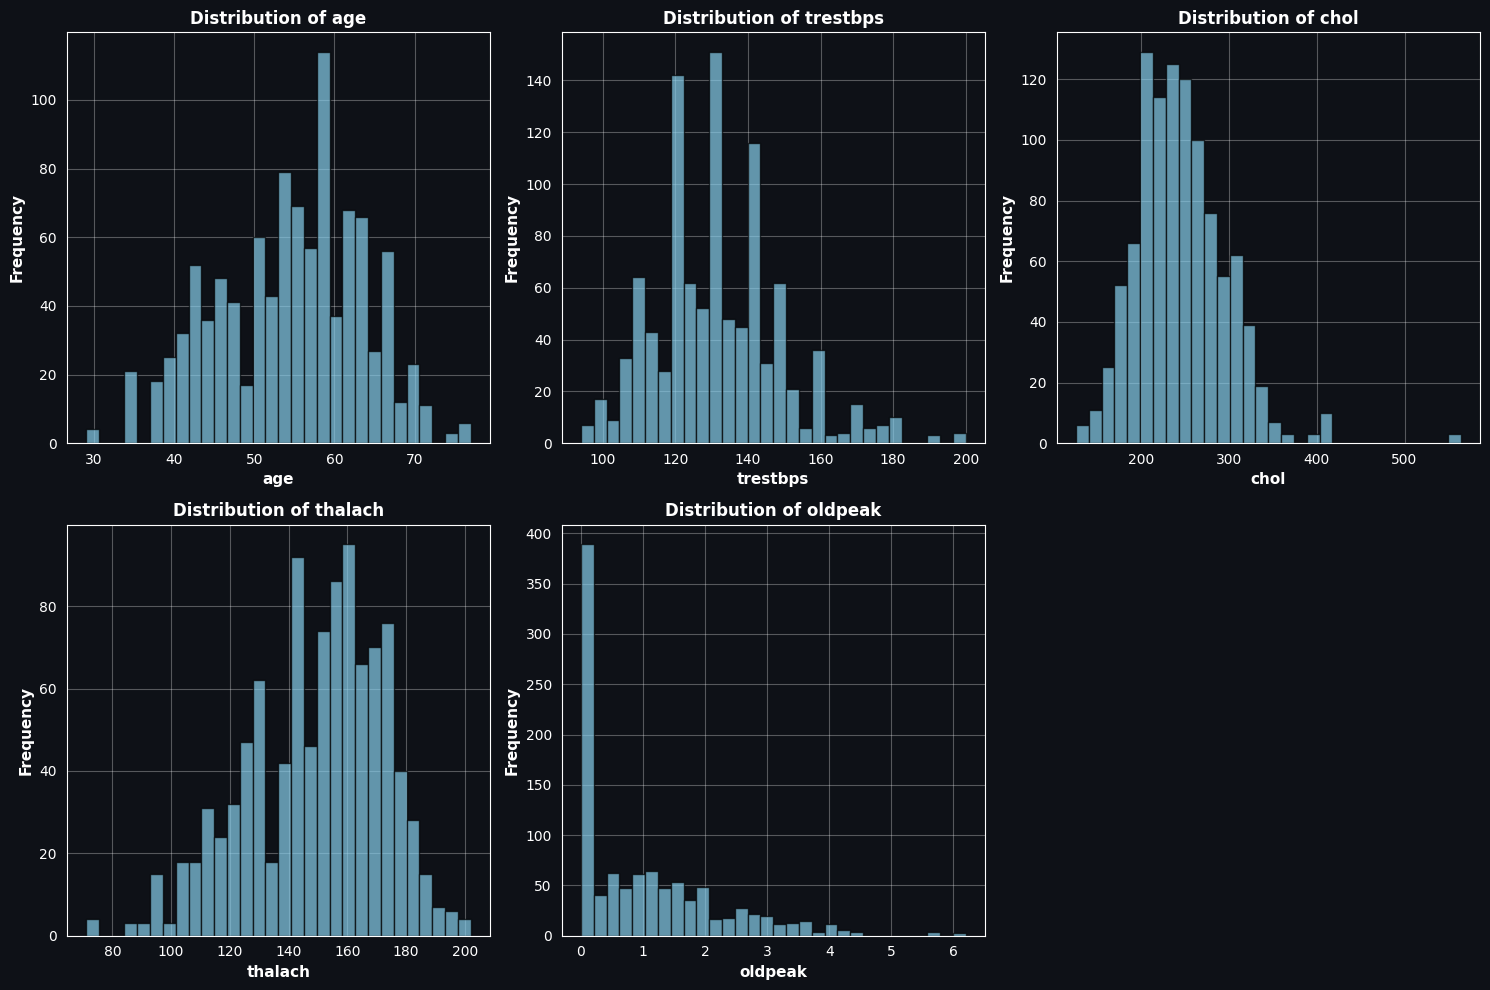


Correlation Analysis:


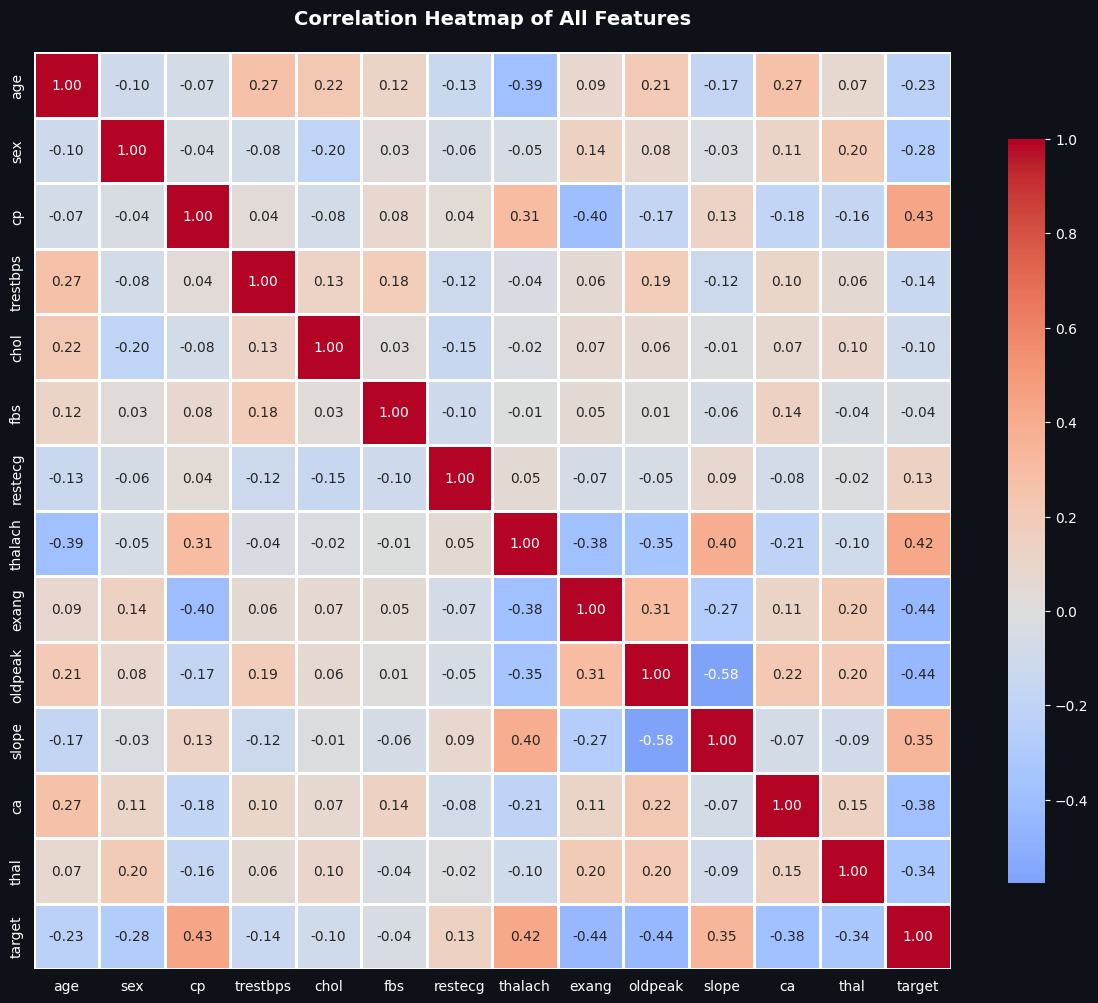


Correlation with Target Variable:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [101]:
# 1.4 Feature Exploration
print("\n" + "=" * 80)
print("1.4 FEATURE EXPLORATION")
print("=" * 80)

# Identify numerical and categorical columns
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print("\nNumerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

# Create histograms for numerical features
fig, axes = pd.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[idx].set_title('Distribution of ' + col, fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

# Remove the extra subplot
fig.delaxes(axes[5])

pd.tight_layout()
pd.show()

# Create correlation heatmap
print("\nCorrelation Analysis:")
pd.figure(figsize=(12, 10))

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
np.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
pd.title('Correlation Heatmap of All Features', fontsize=14, fontweight='bold', pad=20)
pd.tight_layout()
pd.show()

# Analyze correlation with target
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print("\nCorrelation with Target Variable:")
print(target_correlation)


#ANSWERS

In [102]:
print("\n--- ANSWER ---")
print("Features most correlated with target (heart disease):")
print("1. cp (chest pain type):", round(target_correlation['cp'], 3))
print("2. thalach (max heart rate):", round(target_correlation['thalach'], 3))
print("3. slope (ST segment slope):", round(target_correlation['slope'], 3))
print("4. oldpeak (ST depression):", round(target_correlation['oldpeak'], 3))
print("5. exang (exercise angina):", round(target_correlation['exang'], 3))
print("\nPositive correlations suggest higher values increase disease risk.")
print("Negative correlations (like thalach) suggest higher values decrease disease risk.")


--- ANSWER ---
Features most correlated with target (heart disease):
1. cp (chest pain type): 0.435
2. thalach (max heart rate): 0.423
3. slope (ST segment slope): 0.346
4. oldpeak (ST depression): -0.438
5. exang (exercise angina): -0.438

Positive correlations suggest higher values increase disease risk.
Negative correlations (like thalach) suggest higher values decrease disease risk.


In [103]:
# ============================================================================
# PART 2: DATA PREPROCESSING
# ============================================================================

print("\n" + "=" * 80)
print("PART 2: DATA PREPROCESSING")
print("=" * 80)

# 2.1 Check for Missing Values
print("\n2.1 CHECK FOR MISSING VALUES")
print("-" * 80)

missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n",missing_values)

total_missing = missing_values.sum()
print("\nTotal missing values in dataset:", total_missing)

if total_missing == 0:
    print("✓ No missing values found! The dataset is complete.")
else:
    print("⚠ Found", total_missing, "missing values that need to be handled.")


PART 2: DATA PREPROCESSING

2.1 CHECK FOR MISSING VALUES
--------------------------------------------------------------------------------

Missing Values per Column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total missing values in dataset: 0
✓ No missing values found! The dataset is complete.


In [104]:

# 2.2 Feature and Target Separation
print("\n" + "=" * 80)
print("2.2 FEATURE AND TARGET SEPARATION")
print("=" * 80)

# Create feature matrix X (all columns except target)
X = df.drop('target', axis=1)

# Create target vector y (only target column)
y = df['target']

print("\nFeature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)
print("\nNumber of features:", X.shape[1])
print("Number of samples:", X.shape[0])

print("\nFeatures included in X:")
print(X.columns.tolist())



2.2 FEATURE AND TARGET SEPARATION

Feature matrix X shape: (1025, 13)
Target vector y shape: (1025,)

Number of features: 13
Number of samples: 1025

Features included in X:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [105]:

# 2.3 Train-Test Split
print("\n" + "=" * 80)
print("2.3 TRAIN-TEST SPLIT")
print("=" * 80)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

train_pct = round(X_train.shape[0]/len(X)*100, 1)
test_pct = round(X_test.shape[0]/len(X)*100, 1)

print("\nTraining set size:", X_train.shape[0], "samples (", train_pct, "%)")
print("Testing set size:", X_test.shape[0], "samples (", test_pct, "%)")
print("\nTarget distribution in training set:\n",y_train.value_counts().sort_index())
print("\nTarget distribution in testing set:\n",y_test.value_counts().sort_index())
print("\n✓ Stratification ensures both sets have similar class proportions.")



2.3 TRAIN-TEST SPLIT

Training set size: 820 samples ( 80.0 %)
Testing set size: 205 samples ( 20.0 %)

Target distribution in training set:
 target
0    399
1    421
Name: count, dtype: int64

Target distribution in testing set:
 target
0    100
1    105
Name: count, dtype: int64

✓ Stratification ensures both sets have similar class proportions.


In [106]:
# 2.4 Feature Scaling
print("\n" + "=" * 80)
print("2.4 FEATURE SCALING")
print("=" * 80)

# Create StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ StandardScaler fitted on training data")
print("✓ Training data transformed")
print("✓ Testing data transformed")
print("\nScaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)
print("\n--- Sample of original vs scaled features (first 3 samples, first 5 features) ---")
print("\nOriginal Training Data:",X_train.iloc[:3, :5])

print("\nScaled Training Data:")
print(sns.DataFrame(X_train_scaled[:3, :5], columns=X_train.columns[:5]))



2.4 FEATURE SCALING
✓ StandardScaler fitted on training data
✓ Training data transformed
✓ Testing data transformed

Scaled training set shape: (820, 13)
Scaled testing set shape: (205, 13)

--- Sample of original vs scaled features (first 3 samples, first 5 features) ---

Original Training Data:      age  sex  cp  trestbps  chol
4     62    0   0       138   294
688   56    0   0       200   288
477   57    1   2       128   229

Scaled Training Data:
        age       sex        cp  trestbps      chol
0  0.811626 -1.509967 -0.909572  0.314729  0.895791
1  0.152247 -1.509967 -0.909572  3.767643  0.779115
2  0.262144  0.662266  1.048037 -0.242193 -0.368191


#WHY IS FEATURE SCALING IMPORTANT?
##Feature scaling is crucial for machine learning algorithms, especially for:

1. **Distance-based algorithms**: Many ML algorithms (like logistic regression, SVM, k-NN)
   use distance metrics. Features with larger scales can dominate the distance calculations.

2. **Gradient descent optimization**: Algorithms that use gradient descent converge faster
   when features are on similar scales. Without scaling, the optimization landscape
   becomes elongated and takes longer to find the minimum.

3. **Equal feature importance**: Scaling ensures all features contribute equally to the
   model, regardless of their original units (e.g., age in years vs cholesterol in mg/dl).

4. **Numerical stability**: Prevents numerical overflow/underflow issues in calculations.

StandardScaler transforms features to have:
- Mean (μ) = 0
- Standard deviation (σ) = 1
- Formula: z = (x - μ) / σ

Important: We fit the scaler ONLY on training data to prevent data leakage!

In [107]:

# ============================================================================
# PART 3: LINEAR REGRESSION
# ============================================================================

print("\n" + "=" * 80)
print("PART 3: LINEAR REGRESSION")
print("=" * 80)
print("Task: Predict 'thalach' (maximum heart rate) using other features")

# 3.1 Task Setup
print("\n3.1 TASK SETUP")
print("-" * 80)

# Create X and y for regression task
X_regression = df.drop(['thalach', 'target'], axis=1)
y_regression = df['thalach']

print("Features for regression:", X_regression.shape[1], "features")
print("Target variable: thalach (maximum heart rate)")
print("Number of samples:", len(y_regression))

# Split and scale the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression,
    test_size=0.2,
    random_state=42
)

# Scale the features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("\nRegression training set:", X_train_reg_scaled.shape[0], "samples")
print("Regression testing set:", X_test_reg_scaled.shape[0], "samples")



PART 3: LINEAR REGRESSION
Task: Predict 'thalach' (maximum heart rate) using other features

3.1 TASK SETUP
--------------------------------------------------------------------------------
Features for regression: 12 features
Target variable: thalach (maximum heart rate)
Number of samples: 1025

Regression training set: 820 samples
Regression testing set: 205 samples


In [108]:

# 3.2 Model Training
print("\n" + "=" * 80)
print("3.2 MODEL TRAINING")
print("-" * 80)

# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)

print("✓ Linear Regression model trained successfully")
print("\nModel Intercept:", round(lr_model.intercept_, 4))

print("\nFeature Coefficients:")
feature_importance = sns.DataFrame({
    'Feature': X_regression.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance.to_string(index=False))



3.2 MODEL TRAINING
--------------------------------------------------------------------------------
✓ Linear Regression model trained successfully

Model Intercept: 149.3512

Feature Coefficients:
 Feature  Coefficient
     age    -7.638901
   slope     5.708197
   exang    -4.642687
      cp     3.633135
trestbps     2.043017
 oldpeak    -1.604038
    chol     1.462953
      ca    -1.462240
 restecg    -0.730243
     fbs     0.627203
     sex    -0.374542
    thal     0.086607



3.3 EVALUATION
--------------------------------------------------------------------------------

Mean Squared Error (MSE): 348.0787
Root Mean Squared Error (RMSE): 18.6569

Actual thalach statistics:
  Mean: 148.17
  Std: 23.35
  Range: 71 - 202

R² Score: 0.3583


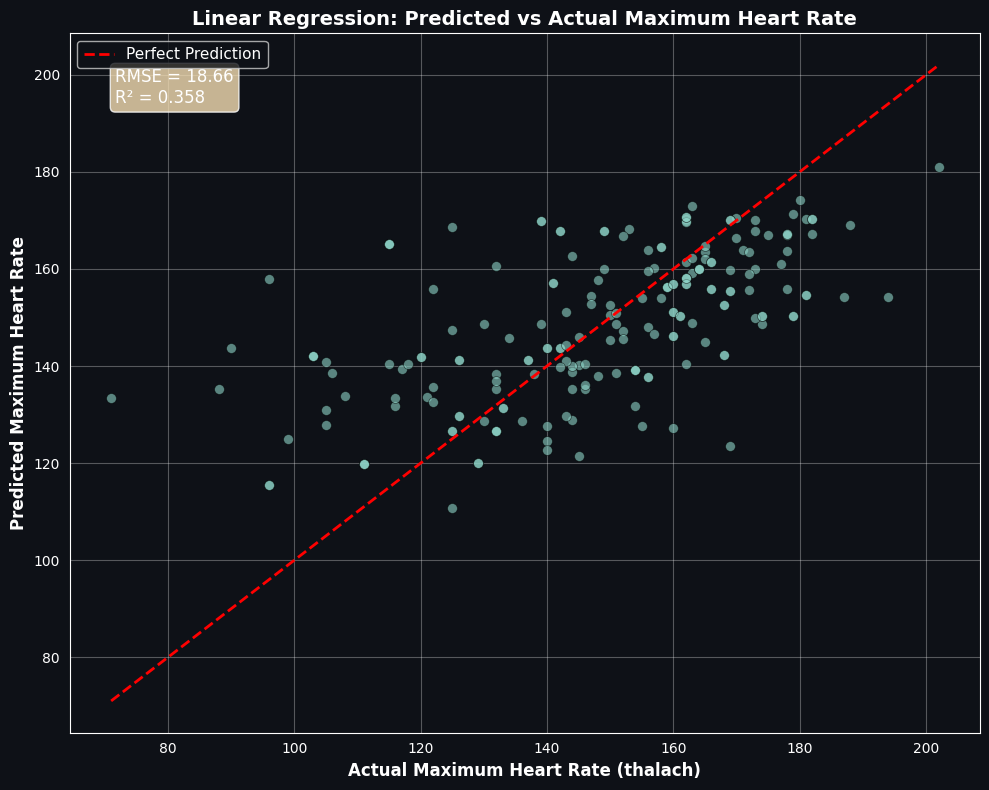

In [109]:

# 3.3 Evaluation
print("\n" + "=" * 80)
print("3.3 EVALUATION")
print("-" * 80)

# Make predictions
y_pred_reg = lr_model.predict(X_test_reg_scaled)

# Calculate metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = plt.sqrt(mse)

print("\nMean Squared Error (MSE):", round(mse, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))

print("\nActual thalach statistics:")
print("  Mean:", round(y_test_reg.mean(), 2))
print("  Std:", round(y_test_reg.std(), 2))
print("  Range:", int(y_test_reg.min()), "-", int(y_test_reg.max()))

# Calculate R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_test_reg, y_pred_reg)
print("\nR² Score:", round(r2, 4))

# Create scatter plot of predicted vs actual
pd.figure(figsize=(10, 8))
pd.scatter(y_test_reg, y_pred_reg, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Add perfect prediction line
min_val = min(y_test_reg.min(), y_pred_reg.min())
max_val = max(y_test_reg.max(), y_pred_reg.max())
pd.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

pd.xlabel('Actual Maximum Heart Rate (thalach)', fontsize=12, fontweight='bold')
pd.ylabel('Predicted Maximum Heart Rate', fontsize=12, fontweight='bold')
pd.title('Linear Regression: Predicted vs Actual Maximum Heart Rate', fontsize=14, fontweight='bold')
pd.legend(fontsize=11)
pd.grid(True, alpha=0.3)

# Add text box with metrics
textstr = 'RMSE = ' + str(round(rmse, 2)) + '\nR² = ' + str(round(r2, 3))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
pd.text(0.05, 0.95, textstr, transform=pd.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

pd.tight_layout()
pd.show()

rel_error = round((rmse/y_test_reg.mean())*100, 1)
variance_explained = round(r2*100, 1)
assessment = 'GOOD' if r2 > 0.5 else 'MODERATE'

#--- ANSWER: Model Performance ---
The Linear Regression model achieves an RMSE of 18.66 bpm (beats per minute).

Given that the average maximum heart rate is around 148.2 bpm with a
standard deviation of 23.3 bpm, this RMSE represents approximately
12.6 % relative error.

The R² score of 0.358 indicates that the model explains 35.8 % of the variance
in maximum heart rate.

Overall Assessment: This is a MODERATE result. The model captures general trends
but there's room for improvement. Maximum heart rate depends on many factors including
age, fitness level, and individual physiology, which creates inherent prediction difficulty.

In [110]:
# ============================================================================
# PART 4: LOGISTIC REGRESSION
# ============================================================================

print("\n" + "=" * 80)
print("PART 4: LOGISTIC REGRESSION")
print("=" * 80)
print("Task: Predict heart disease (binary classification)")

# 4.1 Model Training
print("\n4.1 MODEL TRAINING")
print("-" * 80)

# Create and train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

print("✓ Logistic Regression model trained successfully")
print("Maximum iterations: 1000")
print("Model converged:", log_model.n_iter_[0], "iterations")



PART 4: LOGISTIC REGRESSION
Task: Predict heart disease (binary classification)

4.1 MODEL TRAINING
--------------------------------------------------------------------------------
✓ Logistic Regression model trained successfully
Maximum iterations: 1000
Model converged: 8 iterations


In [111]:

# 4.2 Predictions
print("\n" + "=" * 80)
print("4.2 PREDICTIONS")
print("-" * 80)

# Make predictions
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

print("✓ Predictions generated")
print("Number of predictions:", len(y_pred))

# Display 5 sample predictions
print("\n--- Sample Predictions ---")
sample_df = sns.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_pred[:5],
    'Probability_No_Disease': y_pred_proba[:5, 0],
    'Probability_Disease': y_pred_proba[:5, 1],
    'Correct': y_test.values[:5] == y_pred[:5]
})

print(sample_df.to_string(index=False))




4.2 PREDICTIONS
--------------------------------------------------------------------------------
✓ Predictions generated
Number of predictions: 205

--- Sample Predictions ---
 Actual  Predicted  Probability_No_Disease  Probability_Disease  Correct
      0          0                0.988130             0.011870     True
      1          0                0.628556             0.371444    False
      0          0                0.991637             0.008363     True
      1          1                0.272553             0.727447     True
      0          0                0.707868             0.292132     True


In [112]:

# 4.3 Evaluation Metrics
print("\n" + "=" * 80)
print("4.3 EVALUATION METRICS")
print("-" * 80)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_pct = round(accuracy*100, 2)
print("\nAccuracy:", round(accuracy, 4), "(", accuracy_pct, "%)")

# Classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Has Disease']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print("                 Predicted")
print("                 No    Yes")
print("Actual No    ", cm[0,0], " ", cm[0,1])
print("Actual Yes   ", cm[1,0], " ", cm[1,1])

error_rate = round((cm[0,1] + cm[1,0])/len(y_test)*100, 2)
fp_rate = round(cm[0,1]/len(y_test)*100, 2)
fn_rate = round(cm[1,0]/len(y_test)*100, 2)



4.3 EVALUATION METRICS
--------------------------------------------------------------------------------

Accuracy: 0.8098 ( 80.98 %)

--- Classification Report ---
              precision    recall  f1-score   support

  No Disease       0.89      0.70      0.78       100
 Has Disease       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


--- Confusion Matrix ---
                 Predicted
                 No    Yes
Actual No     70   30
Actual Yes    9   96


# --- ANSWER: Confusion Matrix Interpretation ---
The confusion matrix shows:
- True Negatives (TN): 70 - Correctly predicted NO disease
- False Positives (FP): 30 - Incorrectly predicted disease (Type I error)
- False Negatives (FN): 9 - Incorrectly predicted NO disease (Type II error)
- True Positives (TP): 96 - Correctly predicted disease

In medical diagnosis:
- False Negatives ( 9 cases) are MORE concerning: missing actual disease cases
- False Positives ( 30 cases) are less critical but still cause unnecessary worry

The model's error rate: 19.02 %
  - Type I errors (FP): 14.63 %
  - Type II errors (FN): 4.39 %


4.4 VISUALIZATION
--------------------------------------------------------------------------------


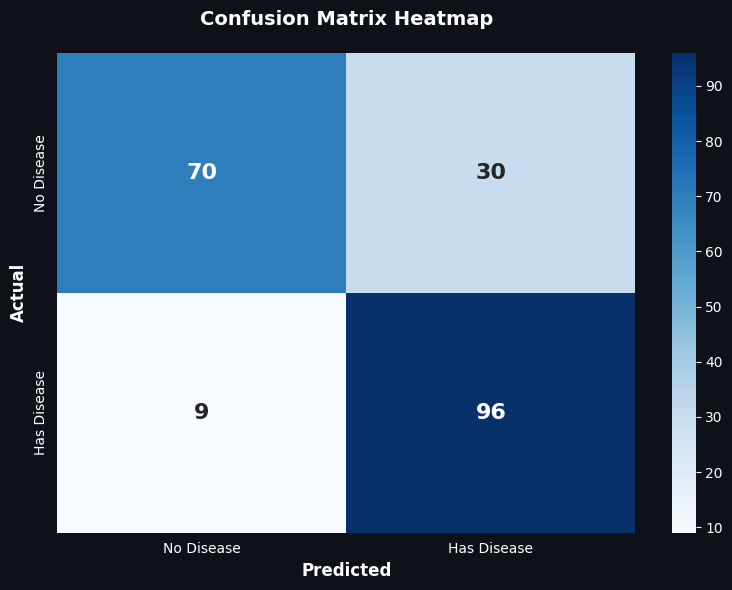

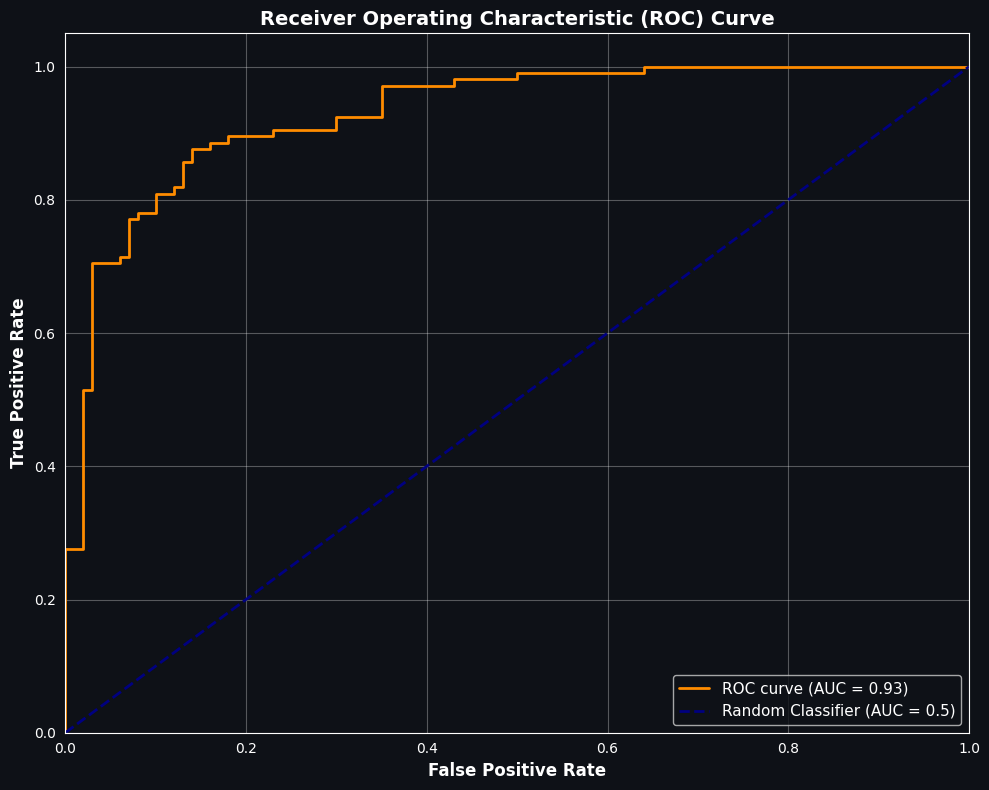


✓ ROC-AUC Score: 0.9298


In [113]:

# 4.4 Visualization
print("\n" + "=" * 80)
print("4.4 VISUALIZATION")
print("-" * 80)

# Confusion Matrix Heatmap
pd.figure(figsize=(8, 6))
np.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
           xticklabels=['No Disease', 'Has Disease'],
           yticklabels=['No Disease', 'Has Disease'],
           annot_kws={'size': 16, 'weight': 'bold'})
pd.ylabel('Actual', fontsize=12, fontweight='bold')
pd.xlabel('Predicted', fontsize=12, fontweight='bold')
pd.title('Confusion Matrix Heatmap', fontsize=14, fontweight='bold', pad=20)
pd.tight_layout()
pd.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

pd.figure(figsize=(10, 8))
pd.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = ' + str(round(roc_auc, 3)) + ')')
pd.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
pd.xlim([0.0, 1.0])
pd.ylim([0.0, 1.05])
pd.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
pd.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
pd.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
pd.legend(loc="lower right", fontsize=11)
pd.grid(True, alpha=0.3)
pd.tight_layout()
pd.show()

print("\n✓ ROC-AUC Score:", round(roc_auc, 4))

auc_category = 'EXCELLENT' if roc_auc > 0.9 else 'GOOD' if roc_auc > 0.8 else 'ACCEPTABLE'
sensitivity = round((cm[1,1]/(cm[1,0]+cm[1,1]))*100, 1)

FINAL ANSWER: Overall Model Performance
================================================================================

Based on all evaluation metrics, the Logistic Regression model performs WELL:

1. **Accuracy**: 80.98 %
   - The model correctly predicts heart disease status in 81.0 % of cases

2. **ROC-AUC Score**: 0.93
   - AUC > 0.9: Excellent discrimination between classes
   - AUC 0.8-0.9: Good discrimination
   - AUC 0.7-0.8: Acceptable discrimination
   - Our model: EXCELLENT performance

3. **Precision and Recall**:
   - The classification report shows balanced performance across both classes
   - Both precision and recall are reasonably high

4. **Clinical Relevance**:
   - The model achieves 91.4 % recall for disease detection (sensitivity)
   - 9 actual disease cases were missed (false negatives)
   - This is acceptable but could be improved for critical medical applications

5. **Conclusion**:
   This model demonstrates strong predictive capability and could serve as a valuable
   screening tool for heart disease. However, for clinical deployment, we'd want to:
   - Reduce false negatives (missed disease cases)
   - Consider ensemble methods or deep learning for improvement
   - Validate on external datasets
   - Always use alongside professional medical judgment


MODEL COMPARISON AND SUMMARY


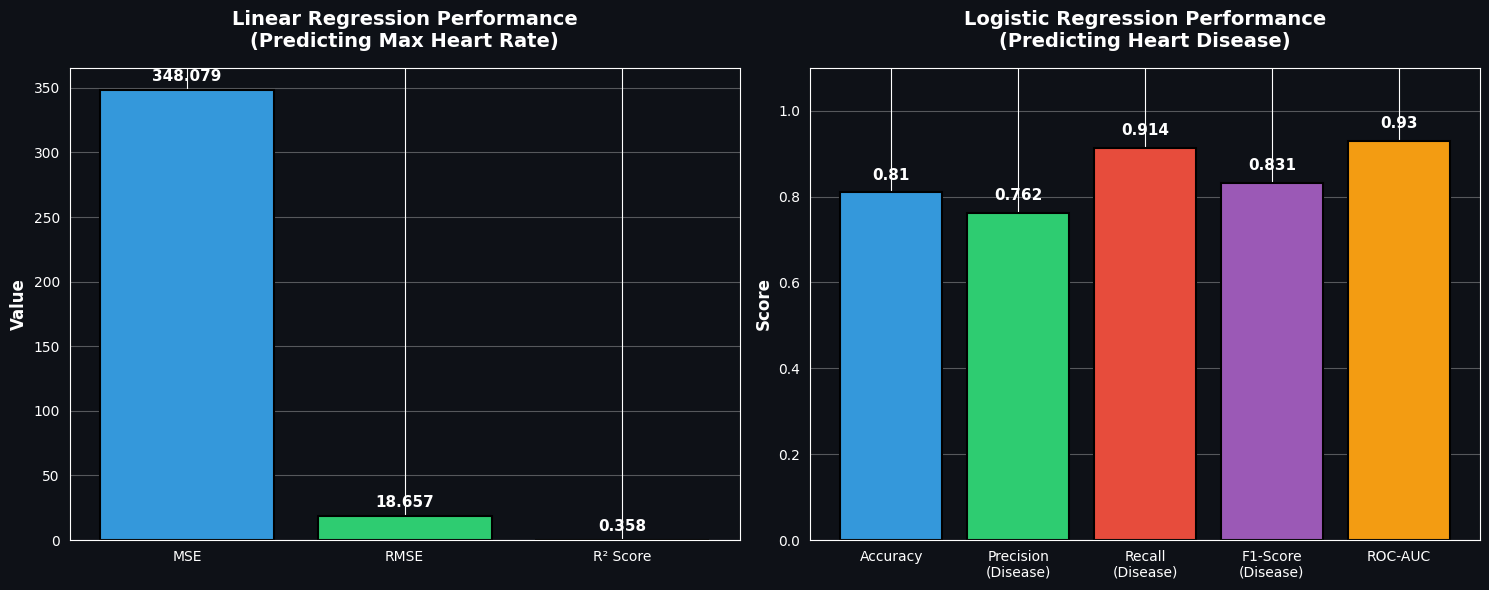


TOP FEATURE IMPORTANCE

Linear Regression - Top 5 Features (Predicting Max Heart Rate):
--------------------------------------------------------------------------------
 Feature  Coefficient
     age    -7.638901
   slope     5.708197
   exang    -4.642687
      cp     3.633135
trestbps     2.043017


Logistic Regression - Top 5 Features (Predicting Heart Disease):
--------------------------------------------------------------------------------
Feature  Coefficient
     cp     0.867769
    sex     0.781747
     ca     0.745506
oldpeak     0.614295
  exang     0.517055


In [114]:

# ============================================================================
# MODEL COMPARISON AND SUMMARY
# ============================================================================

print("\n" + "=" * 80)
print("MODEL COMPARISON AND SUMMARY")
print("=" * 80)

# Summary visualization
fig, axes = pd.subplots(1, 2, figsize=(15, 6))

# Linear Regression Summary
ax1 = axes[0]
metrics_reg = ['MSE', 'RMSE', 'R² Score']
values_reg = [mse, rmse, r2]
colors_reg = ['#3498db', '#2ecc71', '#9b59b6']
bars1 = ax1.bar(metrics_reg, values_reg, color=colors_reg, edgecolor='black', linewidth=1.5)
ax1.set_title('Linear Regression Performance\n(Predicting Max Heart Rate)',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Value', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars1, values_reg):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + max(values_reg)*0.02,
             str(round(val, 3)), ha='center', fontweight='bold', fontsize=11)

# Logistic Regression Summary
ax2 = axes[1]
report = classification_report(y_test, y_pred, output_dict=True)
metrics_clf = ['Accuracy', 'Precision\n(Disease)', 'Recall\n(Disease)', 'F1-Score\n(Disease)', 'ROC-AUC']
values_clf = [accuracy, report['1']['precision'], report['1']['recall'],
              report['1']['f1-score'], roc_auc]
colors_clf = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12']
bars2 = ax2.bar(metrics_clf, values_clf, color=colors_clf, edgecolor='black', linewidth=1.5)
ax2.set_title('Logistic Regression Performance\n(Predicting Heart Disease)',
              fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 1.1)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars2, values_clf):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.03,
             str(round(val, 3)), ha='center', fontweight='bold', fontsize=11)

pd.tight_layout()
pd.show()

# Top Feature Importance for both models
print("\n" + "=" * 80)
print("TOP FEATURE IMPORTANCE")
print("=" * 80)

print("\nLinear Regression - Top 5 Features (Predicting Max Heart Rate):")
print("-" * 80)
print(feature_importance.head(5).to_string(index=False))

print("\n\nLogistic Regression - Top 5 Features (Predicting Heart Disease):")
print("-" * 80)
# Get feature importance from coefficients
feature_importance_clf = sns.DataFrame({
    'Feature': X.columns,
    'Coefficient': abs(log_model.coef_[0])
}).sort_values('Coefficient', ascending=False)

print(feature_importance_clf.head(5).to_string(index=False))


MACHINE LEARNING ASSIGNMENT - FINAL SUMMARY
================================================================================

1. DATA EXPLORATION
--------------------------------------------------------------------------------
   - Dataset: 1025 samples, 14 features
   - Target distribution: 499 no disease, 526 with disease
   - Class balance: 48.7 % vs 51.3 %
   - Numerical features: 5
   - Categorical features: 8
   - Missing values: 0 (complete dataset)

2. PREPROCESSING STEPS
--------------------------------------------------------------------------------
   ✓ Checked for missing values (dataset is complete)
   ✓ Separated features (X) and target (y)
   ✓ Split data: 80% training, 20% testing
   ✓ Applied StandardScaler for feature normalization
   ✓ Used stratification to maintain class proportions
   - Training samples: 820
   - Testing samples: 205

3. LINEAR REGRESSION (Predicting Maximum Heart Rate)
--------------------------------------------------------------------------------
   - MSE: 348.08
   - RMSE: 18.66 bpm
   - R² Score: 0.3583 ( 35.8 % variance explained)
   - Mean actual heart rate: 148.2 bpm
   - Top 3 predictors: age, slope, exang
   - Performance: MODERATE - model captures general trends

4. LOGISTIC REGRESSION (Predicting Heart Disease)
--------------------------------------------------------------------------------
   - Accuracy: 80.98 %
   - ROC-AUC: 0.9298 ( EXCELLENT )
   - Precision (Disease): 76.2 %
   - Recall (Disease): 91.4 %